<a href="https://colab.research.google.com/github/farhan1503001/Satelite-Image-Segmentation/blob/main/Satelite_Image_Processing_Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing the libraries
!pip install patchify
!pip install segmentation_models

In [3]:
import os
import cv2
import numpy as np
import segmentation_models as sm
from patchify import patchify
from PIL import Image
from tensorflow.keras.metrics import MeanIoU
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from matplotlib import pyplot as plt
scaler=MinMaxScaler()

Segmentation Models: using `keras` framework.


In [4]:
root_directory='/content/drive/MyDrive/Semantic segmentation dataset'

patch_size=256

In [5]:
val='/content/drive/MyDrive/Semantic segmentation dataset/Tile 8/masks'.replace('masks','images')
print(val)

/content/drive/MyDrive/Semantic segmentation dataset/Tile 8/images


In [6]:
#create patches of a bigger image using patchify library
image_dataset=[]
mask_dataset=[]
for path,subdirs,files in os.walk(root_directory):
  #print(path)
  dirname=path.split(os.path.sep)[-1]
  if dirname=='images':
    images=os.listdir(path)
    #print(images)
    for i,imagename in enumerate(images):
      print(imagename)
      if imagename.endswith('.jpg'):
        image=cv2.imread(path+'/'+imagename,1)
        #print(path+'/'+imagename)
        mask_path=path +'/'+imagename
        #print(mask_path)
        mask_path=mask_path.replace('.jpg','.png').replace('images','masks')
        #print(mask_path)
        #######################################
        #Reading corresponding mask
        mask=cv2.imread(mask_path,1)
        mask=cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)
        ####image patching############
        size_x=(image.shape[1]//patch_size)*patch_size#Nearest size which is patchable
        size_y=(image.shape[0]//patch_size)*patch_size#Nearest size which is patchable
        ### mask patching#############
        size_x_m=(mask.shape[1]//patch_size)*patch_size
        size_y_m=(mask.shape[0]//patch_size)*patch_size
        #Now converting to a pil image
        image=Image.fromarray(image)
        mask=Image.fromarray(mask)
        #Now we just crop the image for creating patches for training
        image=image.crop((0,0,size_x,size_y))
        mask=mask.crop((0,0,size_x_m,size_y_m))
        #now converting image to a numpy array for easy understanding and visiblity
        image=np.array(image)
        mask=np.array(mask)
        #Now we will start patchifying the images
        print("Now patchifying image",path+"/"+imagename)
        patch_images=patchify(image,patch_size=(patch_size,patch_size,3),step=patch_size)
        print("Patchifying Masks",mask_path)
        patch_masks=patchify(mask,(patch_size,patch_size,3),step=patch_size)
        #Now setting all patched images in a dataset
        for i in range(patch_images.shape[0]):
          for j in range(patch_images.shape[1]):
            #getting single patch image and setting them in dataset array
            single_patch_img=patch_images[i,j,:,:]
            single_patch_img = scaler.fit_transform(single_patch_img.reshape(-1, single_patch_img.shape[-1])).reshape(single_patch_img.shape)
            #Dropping the extra unnecessary dimension
            single_patch_img=single_patch_img[0]
            image_dataset.append(single_patch_img)
        for p in range(patch_masks.shape[0]):
          for q in range(patch_masks.shape[1]):
            single_patch_mask=patch_masks[p,q,:,:]
            #droppping useless dimension
            single_patch_mask=single_patch_mask[0]
            mask_dataset.append(single_patch_mask)

image_part_007.jpg
Now patchifying image /content/drive/MyDrive/Semantic segmentation dataset/Tile 8/images/image_part_007.jpg
Patchifying Masks /content/drive/MyDrive/Semantic segmentation dataset/Tile 8/masks/image_part_007.png
image_part_008.jpg
Now patchifying image /content/drive/MyDrive/Semantic segmentation dataset/Tile 8/images/image_part_008.jpg
Patchifying Masks /content/drive/MyDrive/Semantic segmentation dataset/Tile 8/masks/image_part_008.png
image_part_009.jpg
Now patchifying image /content/drive/MyDrive/Semantic segmentation dataset/Tile 8/images/image_part_009.jpg
Patchifying Masks /content/drive/MyDrive/Semantic segmentation dataset/Tile 8/masks/image_part_009.png
image_part_006.jpg
Now patchifying image /content/drive/MyDrive/Semantic segmentation dataset/Tile 8/images/image_part_006.jpg
Patchifying Masks /content/drive/MyDrive/Semantic segmentation dataset/Tile 8/masks/image_part_006.png
image_part_005.jpg
Now patchifying image /content/drive/MyDrive/Semantic segment

In [7]:
#Now converting those two datasets into numpy array
image_dataset=np.array(image_dataset)
mask_dataset=np.array(mask_dataset)

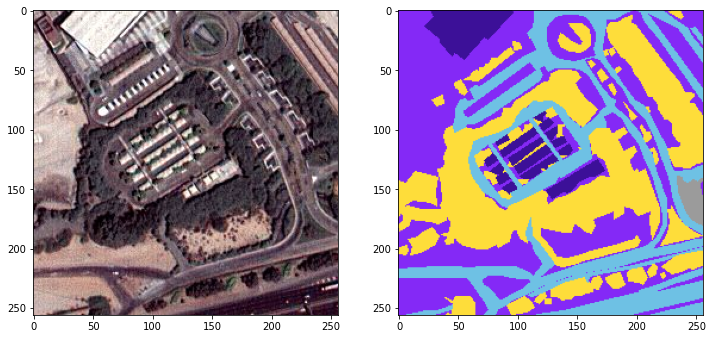

In [8]:
#Now visualizing some images and their corresponding masks for sanity check
import random
image_num=random.randint(0,len(image_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(image_dataset[image_num], (patch_size, patch_size, 3)))
plt.subplot(122)
plt.imshow(np.reshape(mask_dataset[image_num], (patch_size, patch_size, 3)))
plt.show()

In [9]:
#Now Hex to RGB Conversion
value=int('3C',base=16)
print(value)

60


In [10]:
Building = '#3C1098'.lstrip('#')
Building = np.array(tuple(int(Building[i:i+2], 16) for i in (0, 2, 4))) # 60, 16, 152

Land = '#8429F6'.lstrip('#')
Land = np.array(tuple(int(Land[i:i+2], 16) for i in (0, 2, 4))) #132, 41, 246

Road = '#6EC1E4'.lstrip('#') 
Road = np.array(tuple(int(Road[i:i+2], 16) for i in (0, 2, 4))) #110, 193, 228

Vegetation =  'FEDD3A'.lstrip('#') 
Vegetation = np.array(tuple(int(Vegetation[i:i+2], 16) for i in (0, 2, 4))) #254, 221, 58

Water = 'E2A929'.lstrip('#') 
Water = np.array(tuple(int(Water[i:i+2], 16) for i in (0, 2, 4))) #226, 169, 41

Unlabeled = '#9B9B9B'.lstrip('#') 
Unlabeled = np.array(tuple(int(Unlabeled[i:i+2], 16) for i in (0, 2, 4)))

In [11]:
#label=single_patch_mask
#Now we will create a function that will convert mask with hexadecimal to integer values
def color2label(label):
  label_seg=np.zeros(label.shape,dtype=np.uint8)
  label_seg[np.all(label==Building,axis=-1)]=0
  label_seg[np.all(label==Land,axis=-1)]=1
  label_seg[np.all(label==Road,axis=-1)]=2
  label_seg[np.all(label==Vegetation,axis=-1)]=3
  label_seg[np.all(label==Water,axis=-1)]=4
  label_seg[np.all(label==Unlabeled,axis=-1)]=5
  label_seg=label_seg[:,:,0]

  return label_seg

In [12]:
#Now we will convert all the masks to labels
labels=[]
for i in range(mask_dataset.shape[0]):
  temp_label=color2label(mask_dataset[i])
  labels.append(temp_label)
#Now converting labels into a numpy array
labels=np.array(labels)
labels=np.expand_dims(labels,axis=3)

print("Unique labels in this dataset are ",np.unique(labels))

Unique labels in this dataset are  [0 1 2 3 4 5]


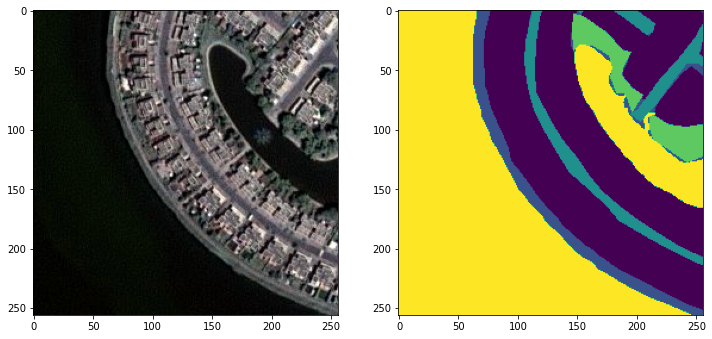

In [13]:
#Another sanity check
import random
import numpy as np
image_number = random.randint(0, len(image_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image_dataset[187])
plt.subplot(122)
plt.imshow(labels[187][:,:,0])
plt.show()

In [15]:
#Now one hot encoding format will be used by me.
num_classes=len(np.unique(labels))
print(num_classes)
from tensorflow.keras.utils import to_categorical
labels_cat=to_categorical(labels,num_classes=num_classes)

6


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(image_dataset,labels_cat,test_size=0.20,random_state=42)
image_dataset=[]
mask_dataset=[]
labels=[]

In [20]:
#Now determining loss function and weights
weights=[0.1666,0.1666,0.1666,0.16666,0.16666,0.16666]

dice_loss=sm.losses.DiceLoss(class_weights=weights)
focal_loss=sm.losses.CategoricalFocalLoss()
total_loss=dice_loss+(1*focal_loss)


In [21]:
img_height=x_train.shape[0]
img_width=x_train.shape[1]
img_channels=x_train.shape[2]

In [29]:
#Now we will try to input the  model
#Today's lab work completed To tired will work on next day
! cp drive/MyDrive/Simple_multi-UNET_model.py

cp: missing destination file operand after 'drive/MyDrive/Simple_multi-UNET_model.py'
Try 'cp --help' for more information.
